## Aprendizado Não Supervisionado - Exemplo Extração de Features

### Material extra

#### Prof. Thomas da Silva Paula

### Exemplo de extração de features

* Utilizando Keras
* Utilizando a rede convolucional VGG-16

## Imports

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

plt.rcParams['figure.figsize'] = [15, 5]

## Criando o modelo

Parâmetros que vamos utilizar

```python
# Utilizar modelo pré-treinado no ImageNet
weights='imagenet'

# Utilizar a rede sem a camada final de classificação
include_top=False

# Indicamos que queremos um average pooling na última camada
pooling='avg'

# Shape de entrada. Neste caso a imagem tem 224px de altura, 224px de largura e 3 canais.
input_shape=(224, 224, 3)
```

In [4]:
model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Exemplo de extração de features

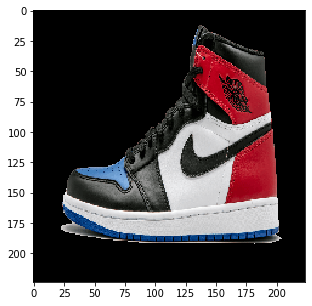

In [6]:
img_path = 'sample_images/sneakers.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

Nós precisamos preparar a imagem utilizando os mesmos passos de pré-processamento que foram utilizados para treinar o modelo. Para nossa sorte, o Keras disponibiliza métodos para nos ajudar.

In [7]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

Verificando shape e tipo das features.

In [8]:
print(features.shape, features.dtype)

(1, 512) float32


Mostrando as features

In [9]:
pprint(features)

array([[0.00000000e+00, 6.06399953e-01, 1.22410882e+00, 0.00000000e+00,
        7.62856543e-01, 9.33533013e-01, 4.70947176e-01, 0.00000000e+00,
        0.00000000e+00, 1.99249611e+01, 1.44660282e+00, 0.00000000e+00,
        1.21801233e+00, 0.00000000e+00, 0.00000000e+00, 1.63899288e+01,
        1.71824515e-01, 2.02668285e+00, 0.00000000e+00, 6.70116520e+00,
        0.00000000e+00, 2.82190061e+00, 1.49625883e-01, 2.95978522e+00,
        0.00000000e+00, 2.55041122e-01, 1.65351748e+00, 3.87282395e+00,
        0.00000000e+00, 6.06584728e-01, 0.00000000e+00, 0.00000000e+00,
        3.17406917e+00, 3.30349565e-01, 0.00000000e+00, 2.93691844e-01,
        0.00000000e+00, 8.24554682e-01, 1.00859620e-01, 0.00000000e+00,
        3.18393230e+00, 1.71129398e+01, 7.41318822e-01, 9.63208556e-01,
        5.14012836e-02, 4.05194235e+00, 6.68010235e+00, 1.39188585e+01,
        4.24688673e+00, 8.61804247e-01, 3.47117949e+00, 5.64510489e+00,
        1.01527452e+01, 1.58298194e+00, 0.00000000e+00, 3.656792

## Extra

### Features para comparação
As features das imagens podem ser utilizadas para comparação. Por exemplo, podemos calcular as features de uma imagem e comparar com features de outras imagens, com o objetivo de retornar as mais similares.

In [10]:
def load_and_extract_features(model, img_path):
    # Carregando imagem como RGBA apenas para mostrar corretamente
    img = image.load_img(img_path, color_mode='rgba')
    plt.imshow(img)
    
    # Carregando imagem como RGB e no tamanho esperado pelo modelo
    img = image.load_img(img_path, target_size=(224, 224))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    
    return features

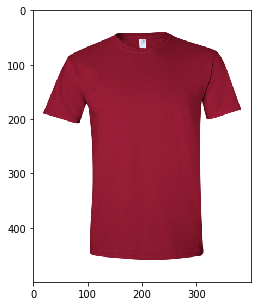

In [11]:
features_tshirt1 = load_and_extract_features(model, 'sample_images/tshirt.png')

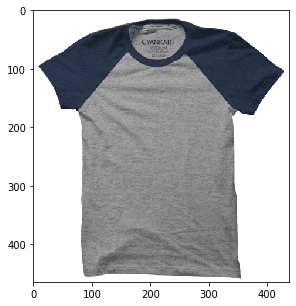

In [12]:
features_tshirt2 = load_and_extract_features(model, 'sample_images/tshirt2.png')

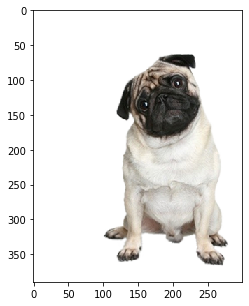

In [13]:
features_pug = load_and_extract_features(model, 'sample_images/pug.png')

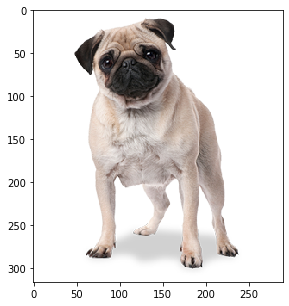

In [14]:
features_pug2 = load_and_extract_features(model, 'sample_images/pug2.png')

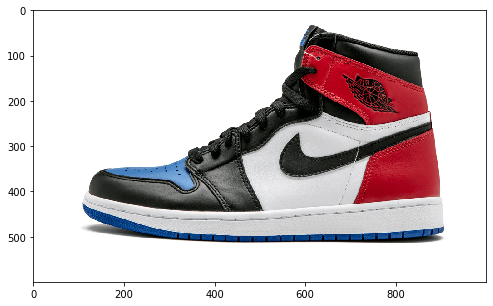

In [15]:
features_sneakers = load_and_extract_features(model, 'sample_images/sneakers.png')

### Calculando a distância entre as features
Nós podemos então calcular a distância entre as features e avaliar se determinada imagem é mais ou menos parecida em relação a outras imagens

In [16]:
from scipy.spatial.distance import cosine

#### T-shirt 1 vs Pug 1

In [17]:
distance = cosine(features_tshirt1, features_pug)
print(distance)

0.8084378838539124


#### T-shirt 2 vs Pug 2

In [18]:
distance = cosine(features_tshirt2, features_pug2)
print(distance)

0.7392519414424896


#### Pug 1 vs Sneakers

In [19]:
distance = cosine(features_pug, features_sneakers)
print(distance)

0.7406953573226929


#### T-shirt 1 vs T-shirt 2

In [20]:
distance = cosine(features_tshirt1, features_tshirt2)
print(distance)

0.277995765209198


#### Pug 1 vs Pug 2

In [21]:
distance = cosine(features_pug, features_pug2)
print(distance)

0.1309639811515808


In [22]:
distance = cosine(features_pug, features_pug)
print(distance)

0.0


### Nós também podemos utilizar as features para outras tarefas
Vamos ver como elas funcionam no nosso trabalho :)